In [1]:
import os
import pickle
import json
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import rcParams
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import pearsonr

rcParams["font.family"] = "serif"
rcParams["grid.linestyle"] = ':'
rcParams["xtick.direction"] = 'in'
rcParams["ytick.direction"] = 'in'
rcParams["legend.fontsize"] = 11
rcParams["axes.labelsize"] = 18
rcParams["axes.titlesize"] = 20
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15

In [2]:
plot_file_template = './plots/log-linear-all-datasets-plot-counttype_{}_prompttype_{}_ptdataset_{}_model_{}_retrieval.pkl'

## CC3M

In [6]:
prompt_types = [
    't2i_k=1',
    't2i_k=5',
    't2i_k=10',
    'i2t_k=1',
    'i2t_k=5',
    'i2t_k=10',
]

/tmp/ipykernel_78310/2773214641.py:35: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 5*10**6)
/tmp/ipykernel_78310/2773214641.py:62: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 5*10**5)
/tmp/ipykernel_78310/2773214641.py:89: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 2*10**5)


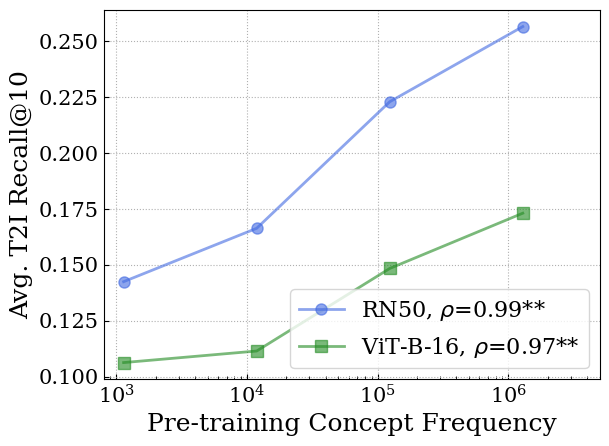

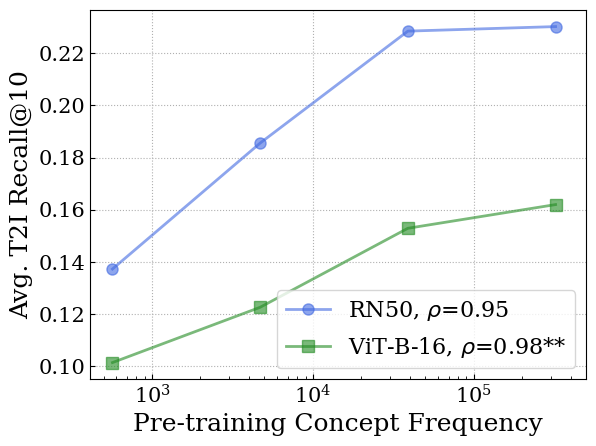

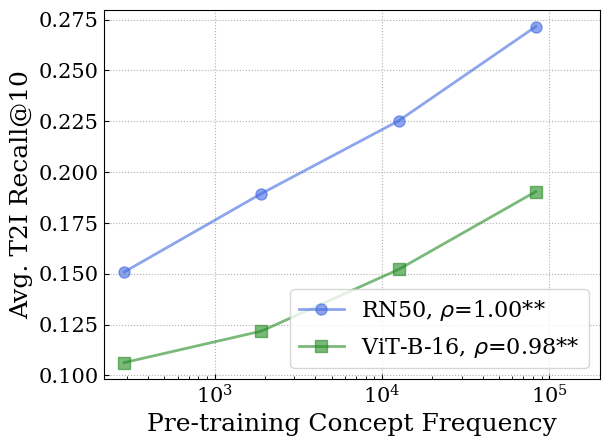

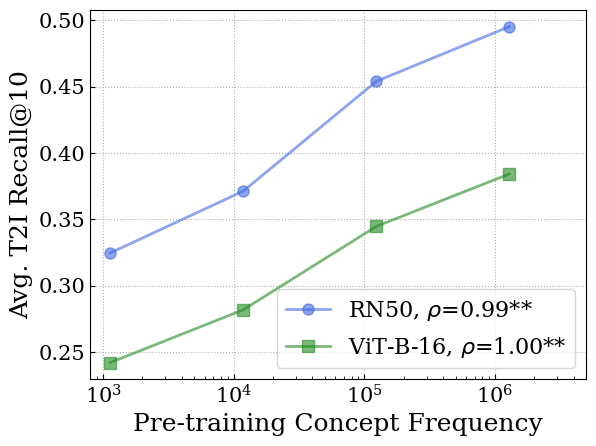

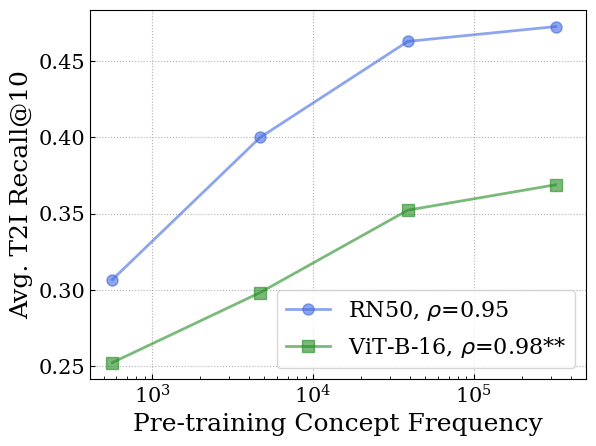

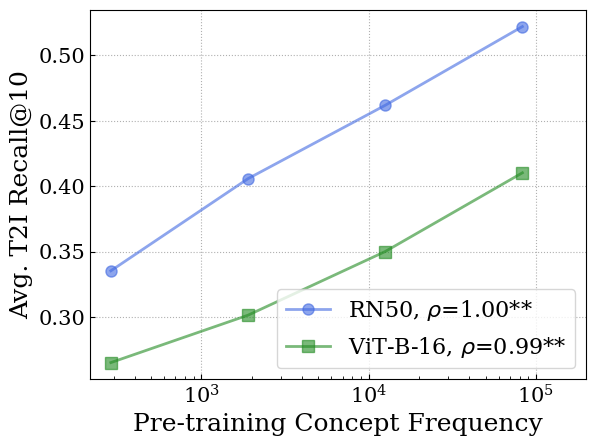

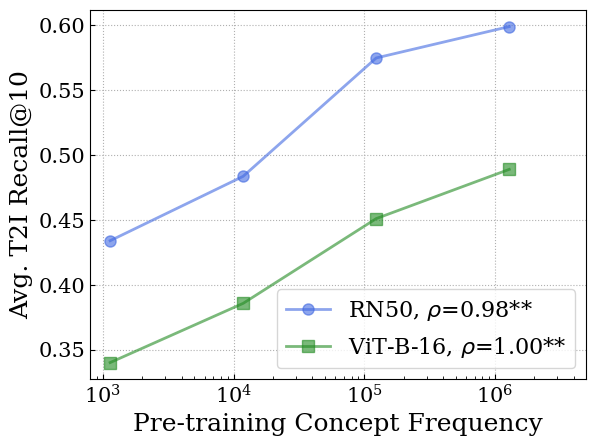

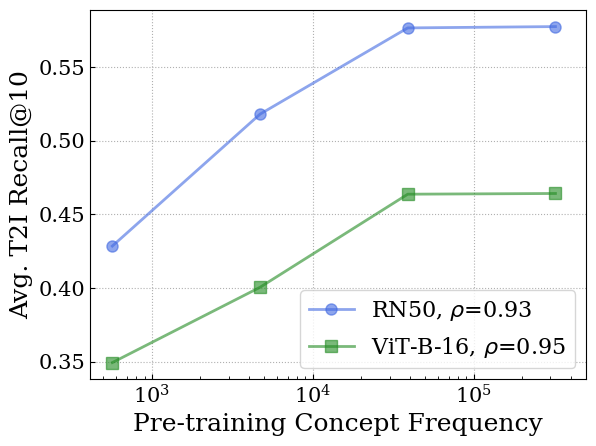

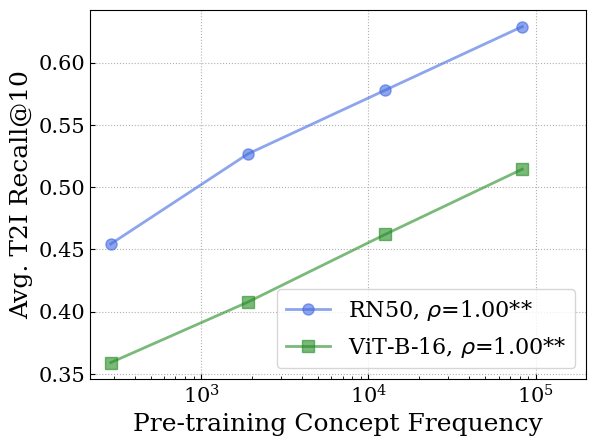

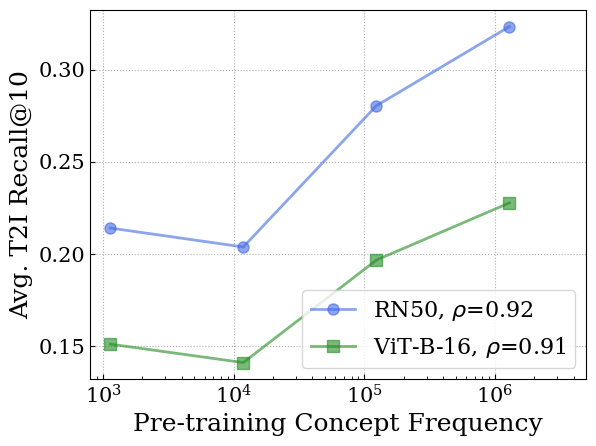

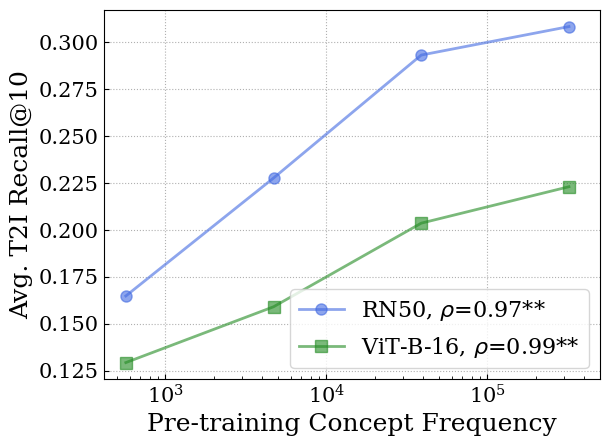

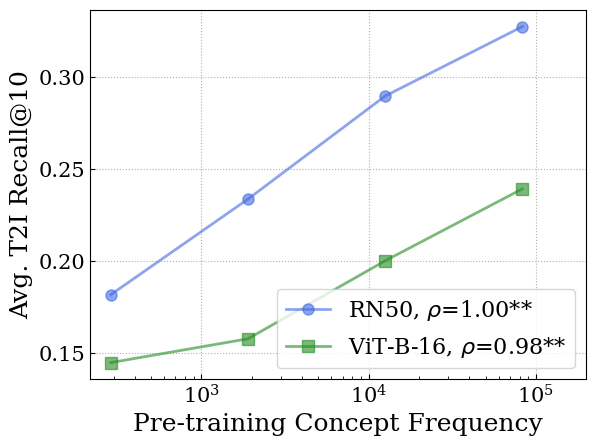

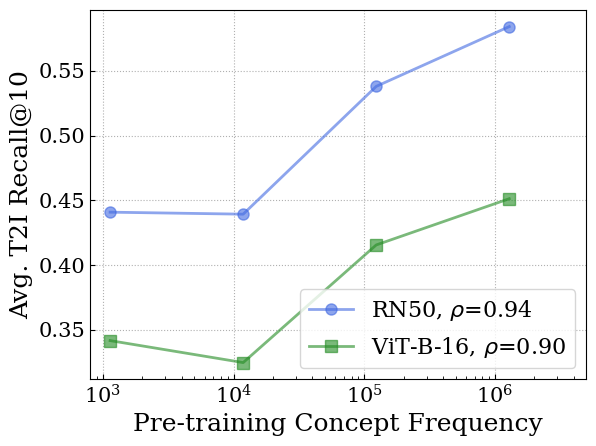

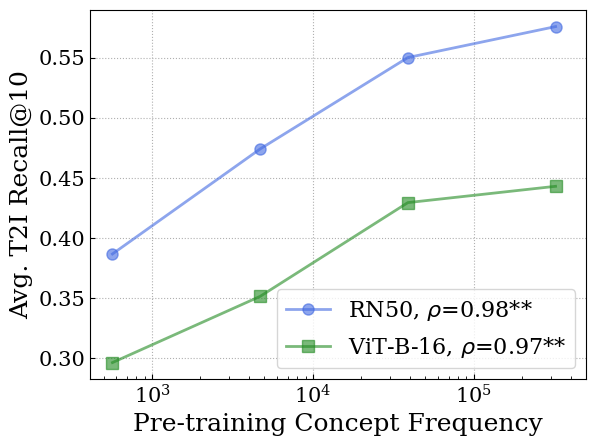

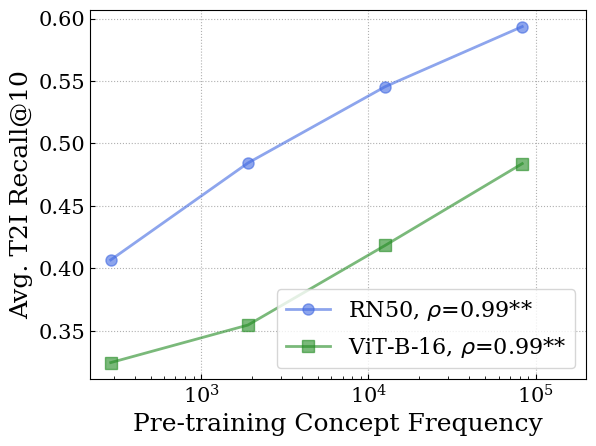

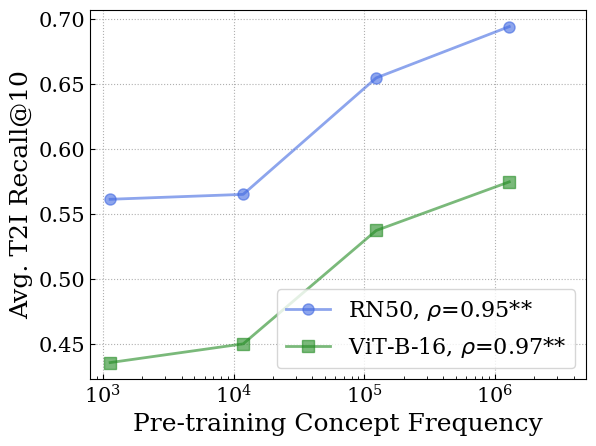

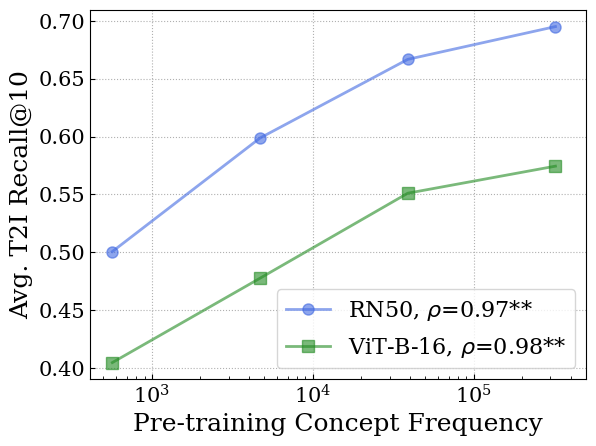

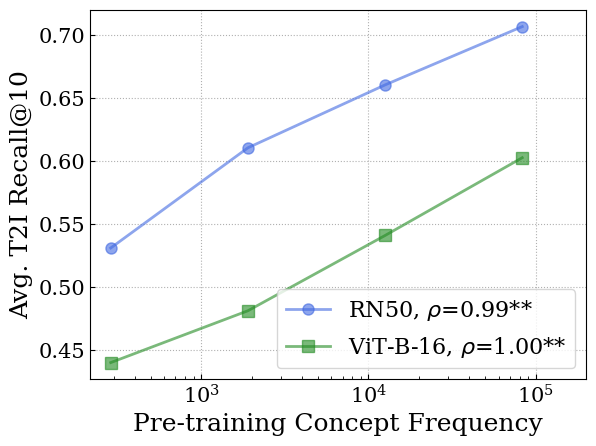

In [7]:
for pt in prompt_types:
    prompt_type = pt
    image_search_type = 'rampp0.7'
    text_search_type = 'lemmatized'
    integrated_search_type = 'integrated_rampp0.7'
    pt_dataset = 'cc3m'
    
    # image-search
    rn50_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # # text-search
    rn50_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # integrated-search
    rn50_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    
    plt.figure(figsize=(6.4, 4.8))
    # image-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_image_res['exp_bins'][-4:]), rn50_image_res['cum_means'][-4:])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_image_res['exp_bins'][-4:]), vitb16_image_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    
    plt.plot(rn50_image_res['exp_bins'][-4:], rn50_image_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_image_res['exp_bins'][-4:], vitb16_image_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 5*10**6)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=16)
    
    # plt.text(0.05, 0.95, f'RN50 Pearson r={rn50_corr:.2f}', transform=plt.gca().transAxes, color='royalblue')
    # plt.text(0.05, 0.90, f'ViT-B-16 Pearson r={vitb16_corr:.2f}', transform=plt.gca().transAxes, color='forestgreen')
    
    # plt.title('Accuracies vs PCF for CC-3M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-cc3m-retrieval-log-linear-plot-image-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)
    
    plt.figure(figsize=(6.4, 4.8))
    # text-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_text_res['exp_bins'][-4:]), rn50_text_res['cum_means'][-4:])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_text_res['exp_bins'][-4:]), vitb16_text_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    
    plt.plot(rn50_text_res['exp_bins'][-4:], rn50_text_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_text_res['exp_bins'][-4:], vitb16_text_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 5*10**5)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=16)
    
    # plt.text(0.05, 0.95, f'RN50 Pearson r={rn50_corr:.2f}', transform=plt.gca().transAxes, color='royalblue')
    # plt.text(0.05, 0.90, f'ViT-B-16 Pearson r={vitb16_corr:.2f}', transform=plt.gca().transAxes, color='forestgreen')
    
    # plt.title('Accuracies vs PCF for CC-3M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-cc3m-retrieval-log-linear-plot-text-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)
    
    plt.figure(figsize=(6.4, 4.8))
    # integrated-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_integrated_res['exp_bins'][-4:]), rn50_integrated_res['cum_means'][-4:])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_integrated_res['exp_bins'][-4:]), vitb16_integrated_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    
    plt.plot(rn50_integrated_res['exp_bins'][-4:], rn50_integrated_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_integrated_res['exp_bins'][-4:], vitb16_integrated_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 2*10**5)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=16)
    
    # plt.text(0.05, 0.95, f'RN50 Pearson r={rn50_corr:.2f}', transform=plt.gca().transAxes, color='royalblue')
    # plt.text(0.05, 0.90, f'ViT-B-16 Pearson r={vitb16_corr:.2f}', transform=plt.gca().transAxes, color='forestgreen')
    
    # plt.title('Accuracies vs PCF for CC-3M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-cc3m-retrieval-log-linear-plot-integrated-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)


## CC12M

In [8]:
prompt_types = [
    't2i_k=1',
    't2i_k=5',
    't2i_k=10',
    'i2t_k=1',
    'i2t_k=5',
    'i2t_k=10',
]

/tmp/ipykernel_78310/533806823.py:35: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 5*10**7)
/tmp/ipykernel_78310/533806823.py:60: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 9*10**5)
/tmp/ipykernel_78310/533806823.py:84: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 9*10**5)


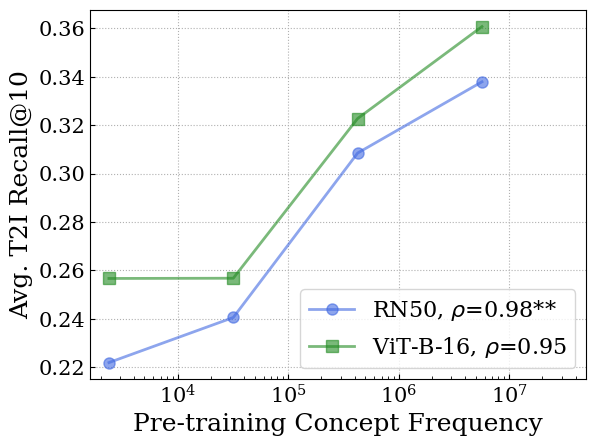

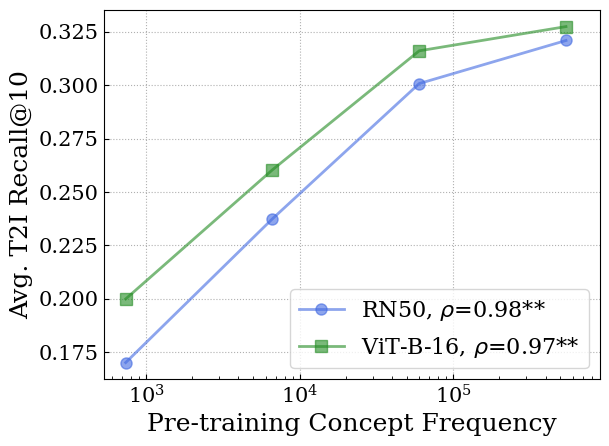

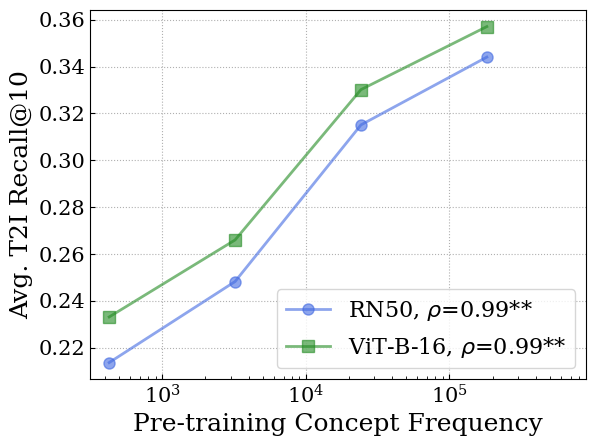

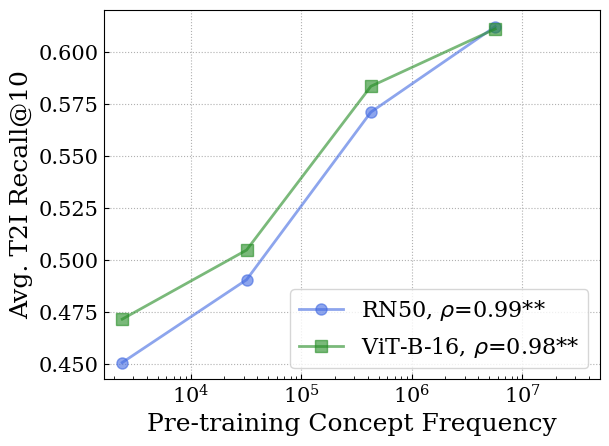

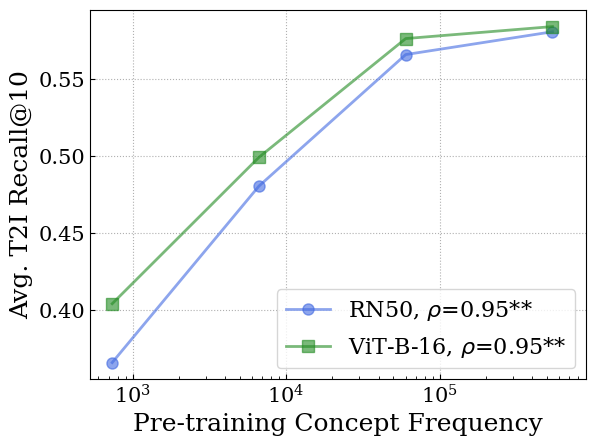

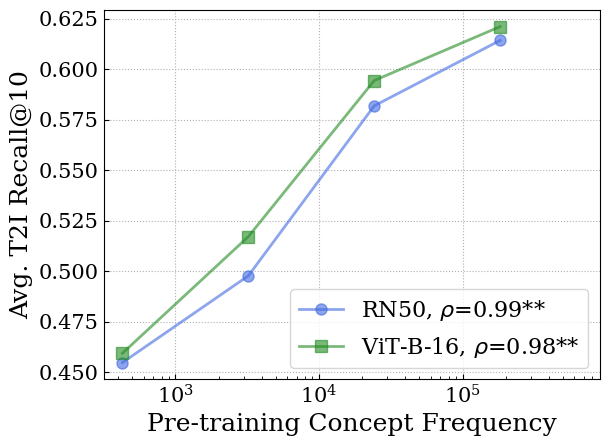

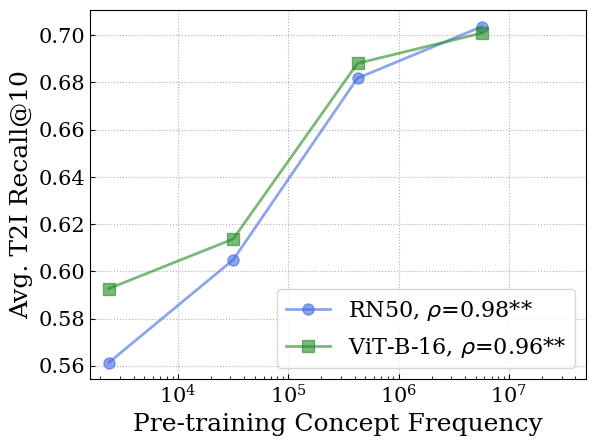

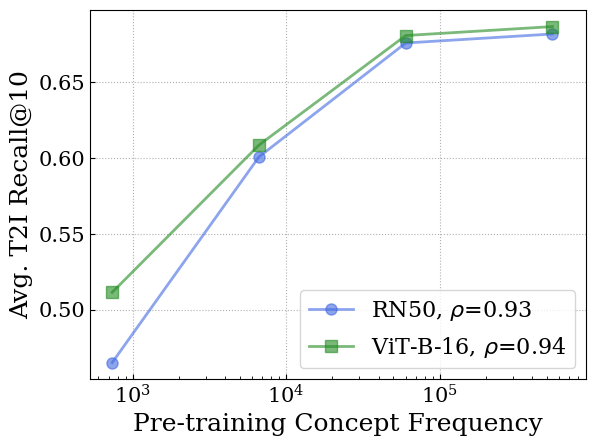

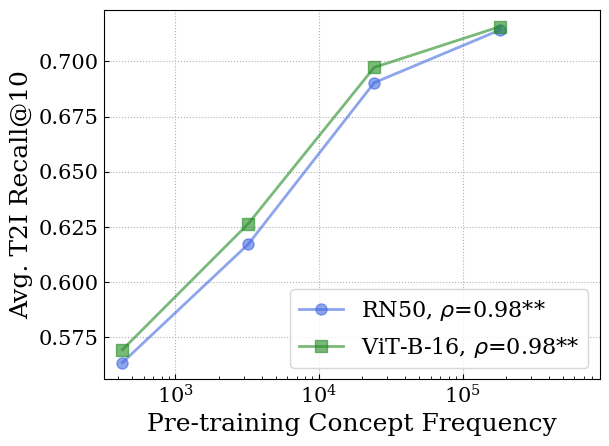

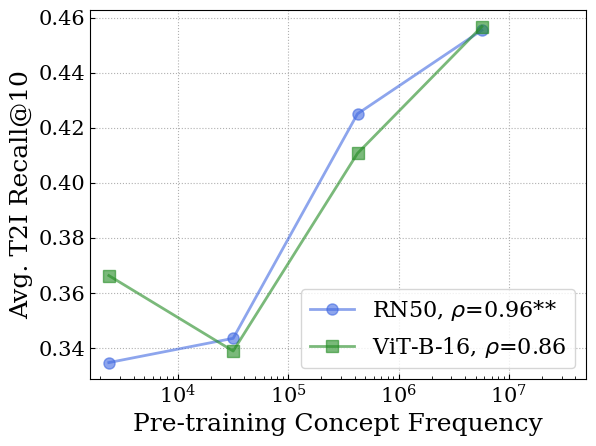

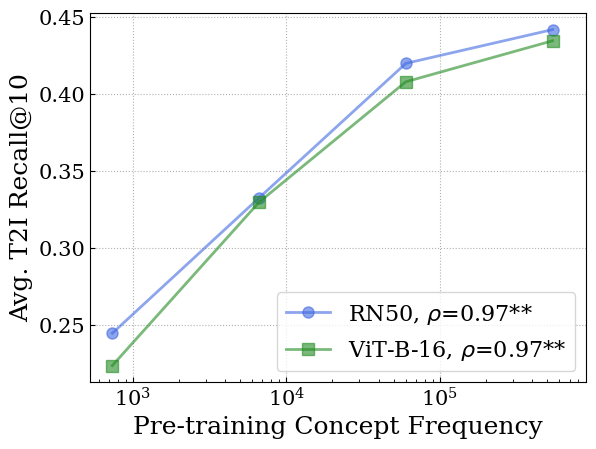

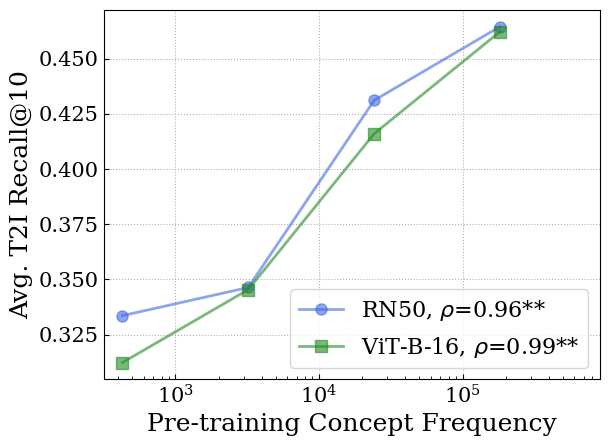

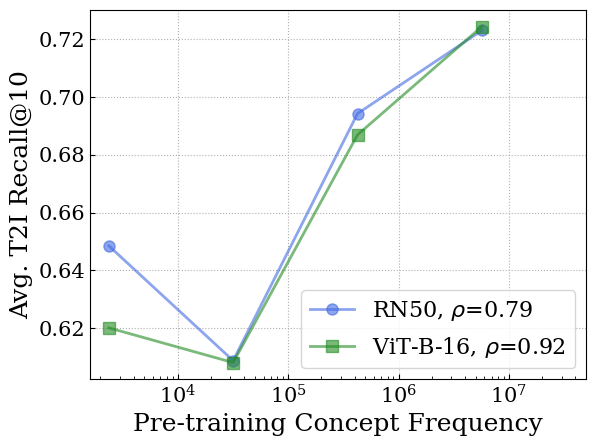

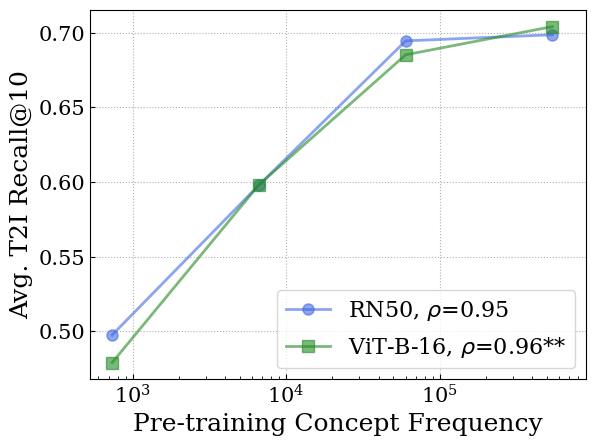

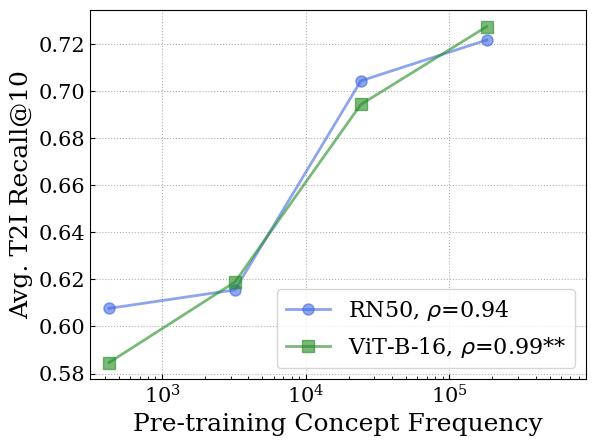

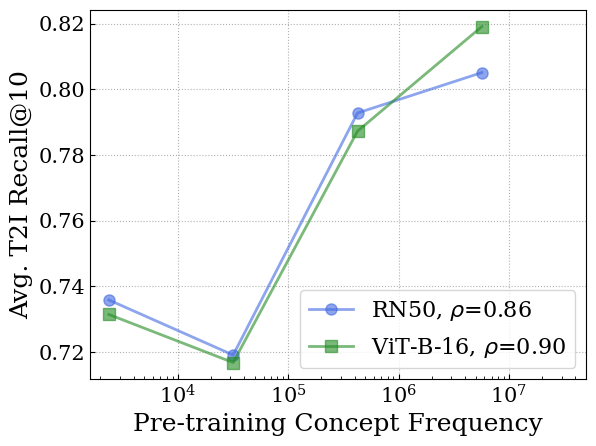

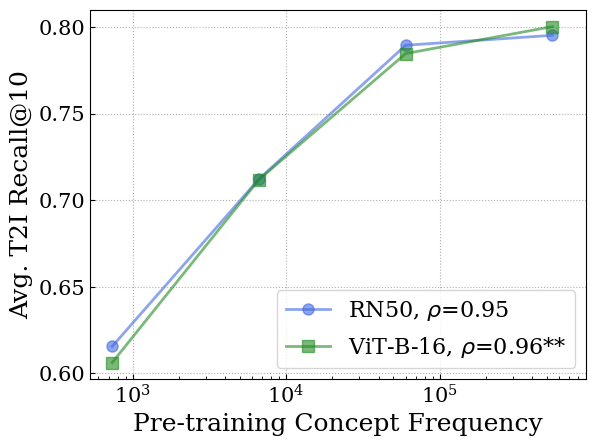

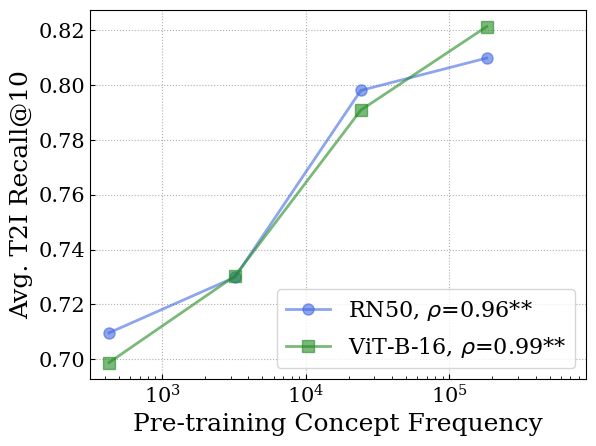

In [9]:

for pt in prompt_types:

    prompt_type = pt
    image_search_type = 'rampp0.7'
    text_search_type = 'lemmatized'
    pt_dataset = 'cc12m'
    integrated_search_type = 'integrated_rampp0.7'
    
    # image-search
    rn50_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # text-search
    rn50_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # integrated-search
    rn50_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))

    plt.figure(figsize=(6.4, 4.8))
    # image-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_image_res['exp_bins'][-4:]), rn50_image_res['cum_means'][-4:])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_image_res['exp_bins'][-4:]), vitb16_image_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    
    plt.plot(rn50_image_res['exp_bins'][-4:], rn50_image_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_image_res['exp_bins'][-4:], vitb16_image_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 5*10**7)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=16)
    
    # plt.title('Accuracies vs PCF for CC-12M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-cc12m-retrieval-log-linear-plot-image-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)


    plt.figure(figsize=(6.4, 4.8))
    # text-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_text_res['exp_bins'][-4:]), rn50_text_res['cum_means'][-4:])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_text_res['exp_bins'][-4:]), vitb16_text_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    
    plt.plot(rn50_text_res['exp_bins'][-4:], rn50_text_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_text_res['exp_bins'][-4:], vitb16_text_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 9*10**5)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=16)
    
    # plt.title('Accuracies vs PCF for CC-12M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-cc12m-retrieval-log-linear-plot-text-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)

    plt.figure(figsize=(6.4, 4.8))
    # integrated-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_integrated_res['exp_bins'][-4:]), rn50_integrated_res['cum_means'][-4:])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_integrated_res['exp_bins'][-4:]), vitb16_integrated_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    
    plt.plot(rn50_integrated_res['exp_bins'][-4:], rn50_integrated_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_integrated_res['exp_bins'][-4:], vitb16_integrated_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 9*10**5)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=16)
    
    # plt.title('Accuracies vs PCF for CC-12M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-cc12m-retrieval-log-linear-plot-integrated-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)



## LAION400M

In [3]:
prompt_types = [
    't2i_k=1',
    't2i_k=5',
    't2i_k=10',
    'i2t_k=1',
    'i2t_k=5',
    'i2t_k=10',
]

/tmp/ipykernel_2221836/4123997547.py:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 3*10**8)
/tmp/ipykernel_2221836/4123997547.py:72: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 2*10**7)
/tmp/ipykernel_2221836/4123997547.py:100: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 2*10**7)


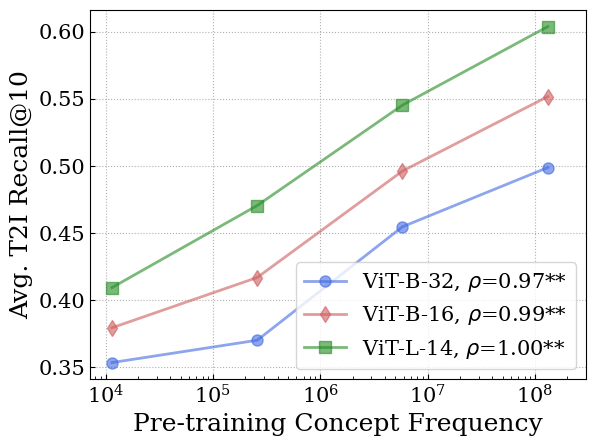

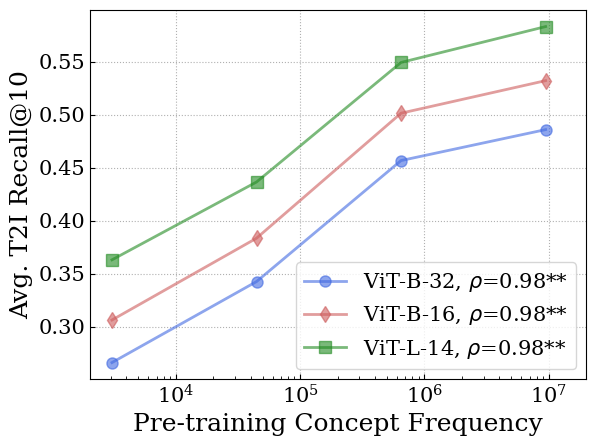

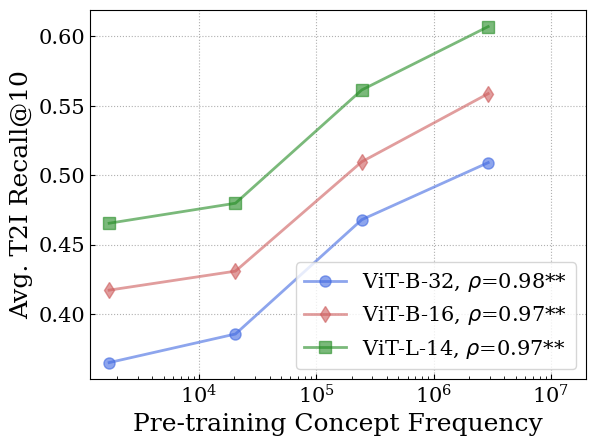

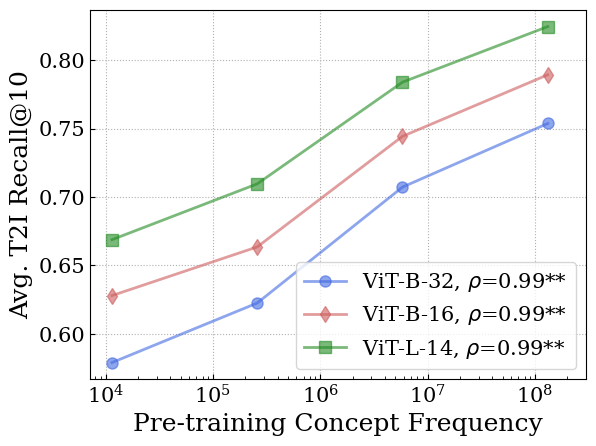

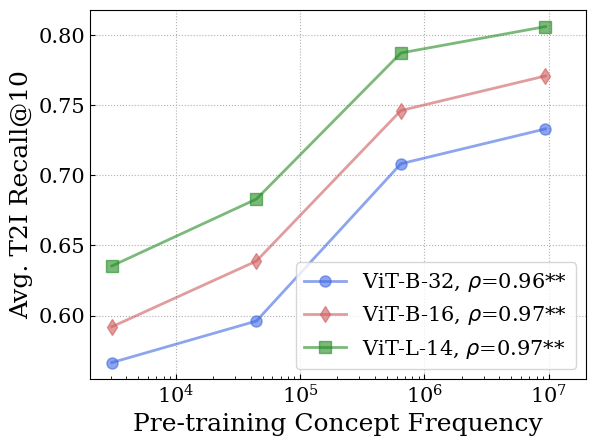

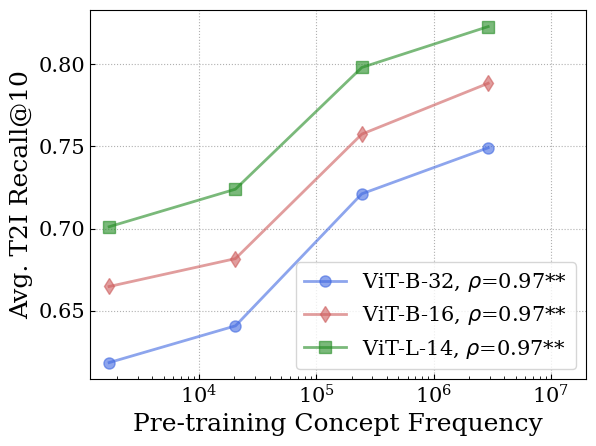

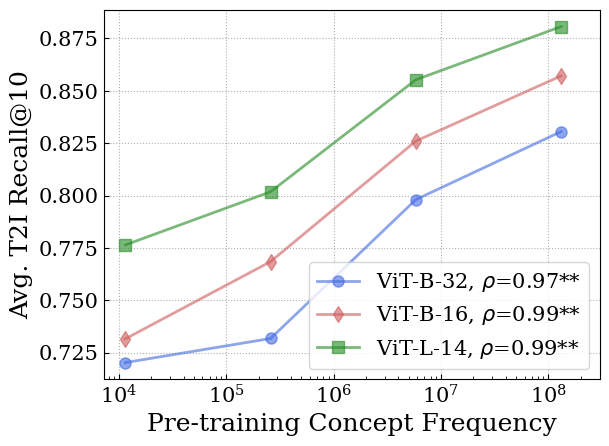

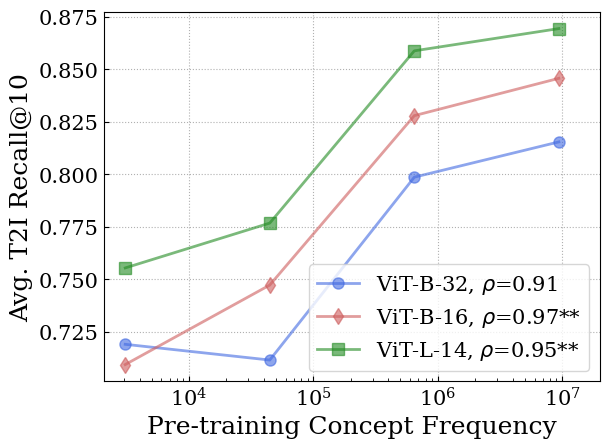

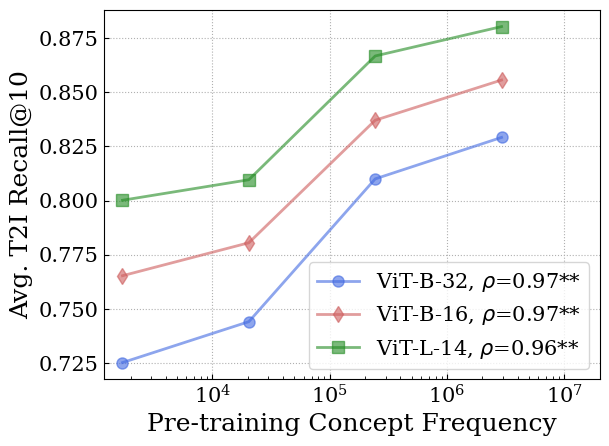

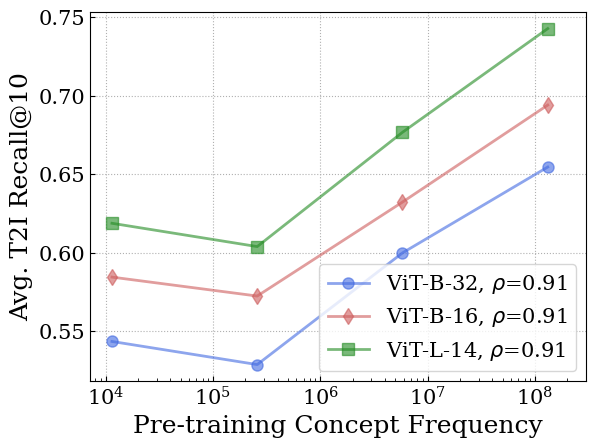

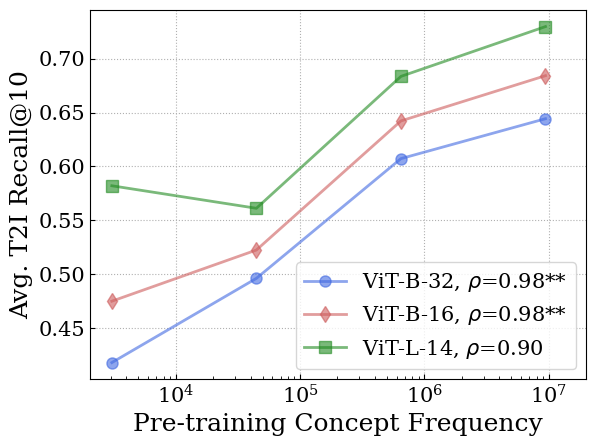

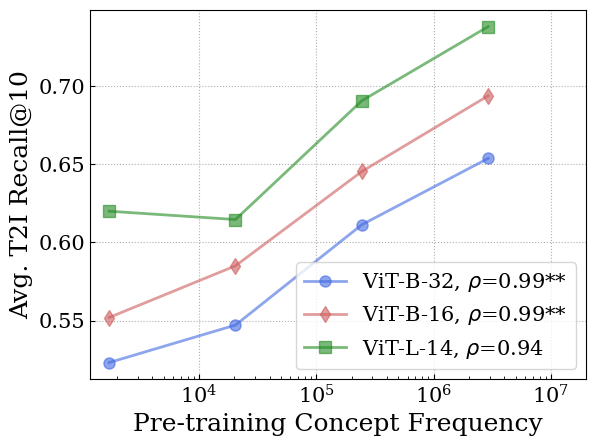

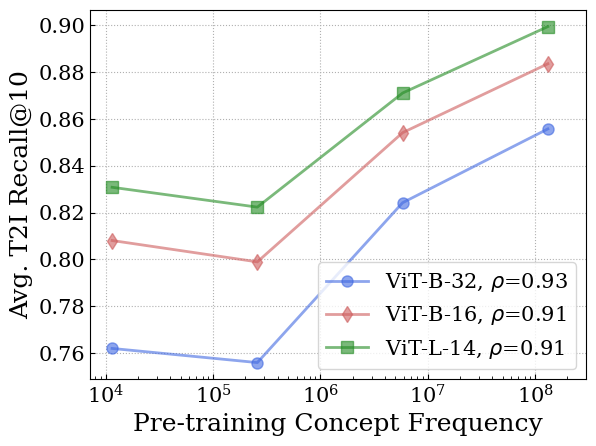

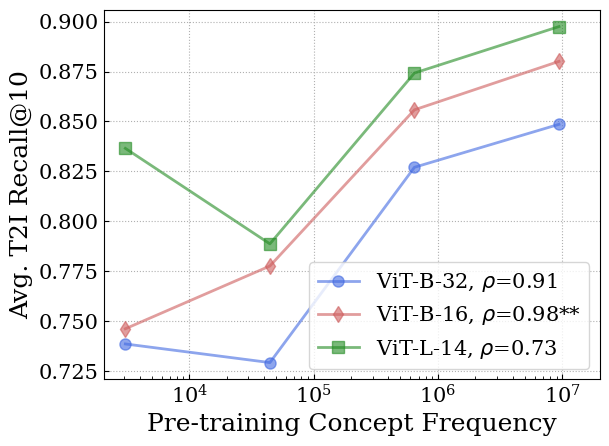

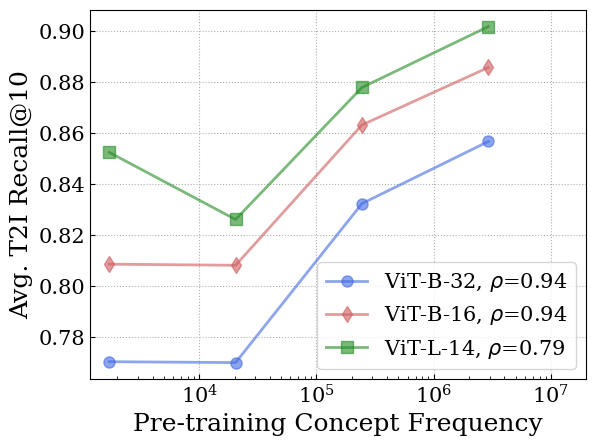

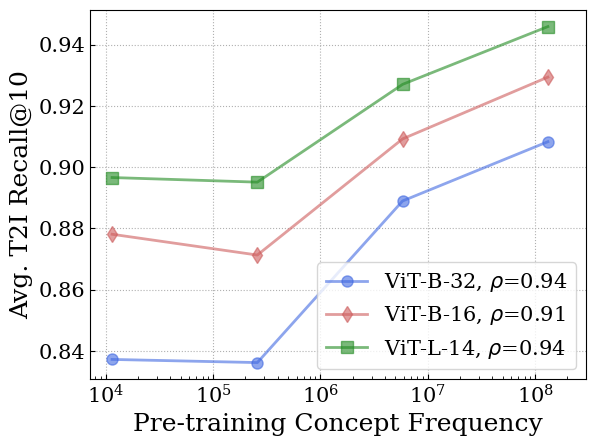

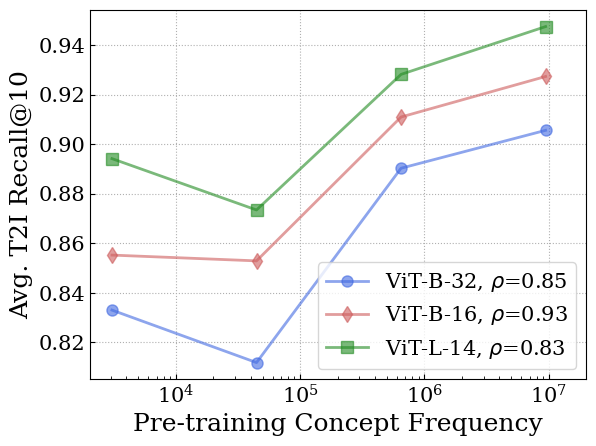

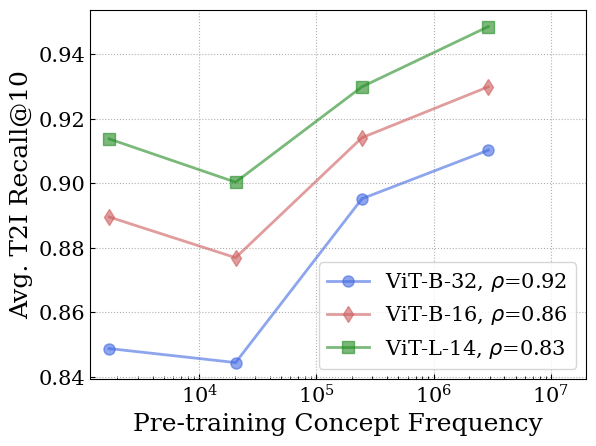

In [4]:
for pt in prompt_types:

    prompt_type = pt
    image_search_type = 'rampp0.7'
    text_search_type = 'lemmatized'
    integrated_search_type = 'integrated_rampp0.7'
    pt_dataset = 'laion400m'
    
    # image-search
    # rn50_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb32_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-32'), 'rb'))
    vitb16_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    vitl14_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-L-14'), 'rb'))
    
    # text-search
    # rn50_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb32_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-32'), 'rb'))
    vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    vitl14_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-L-14'), 'rb'))

    # integrated-search
    # rn50_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb32_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-32'), 'rb'))
    vitb16_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    vitl14_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-L-14'), 'rb'))
    
    plt.figure(figsize=(6.4, 4.8))
    # image-search
    
    vitb32_corr, sig1 = pearsonr(np.log(vitb32_image_res['exp_bins'][-4:]), vitb32_image_res['cum_means'][-4:])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_image_res['exp_bins'][-4:]), vitb16_image_res['cum_means'][-4:])
    vitl14_corr, sig3 = pearsonr(np.log(vitl14_image_res['exp_bins'][-4:]), vitl14_image_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    add3 = '**' if sig3<0.05 else ''
    
    plt.plot(vitb32_image_res['exp_bins'][-4:], vitb32_image_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'ViT-B-32, $\\rho$={vitb32_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_image_res['exp_bins'][-4:], vitb16_image_res['cum_means'][-4:], marker='d', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='indianred')
    plt.plot(vitl14_image_res['exp_bins'][-4:], vitl14_image_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-L-14, $\\rho$={vitl14_corr:.2f}'+add3, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 3*10**8)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=15)
    
    # plt.title('Accuracies vs PCF for LAION-400M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-laion400m-retrieval-log-linear-plot-image-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)


    plt.figure(figsize=(6.4, 4.8))
    # text-search
    
    vitb32_corr, sig1 = pearsonr(np.log(vitb32_text_res['exp_bins'][-4:]), vitb32_text_res['cum_means'][-4:])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_text_res['exp_bins'][-4:]), vitb16_text_res['cum_means'][-4:])
    vitl14_corr, sig3 = pearsonr(np.log(vitl14_text_res['exp_bins'][-4:]), vitl14_text_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    add3 = '**' if sig3<0.05 else ''
    
    plt.plot(vitb32_text_res['exp_bins'][-4:], vitb32_text_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'ViT-B-32, $\\rho$={vitb32_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_text_res['exp_bins'][-4:], vitb16_text_res['cum_means'][-4:], marker='d', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='indianred')
    plt.plot(vitl14_text_res['exp_bins'][-4:], vitl14_text_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-L-14, $\\rho$={vitl14_corr:.2f}'+add3, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 2*10**7)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=15)
    
    # plt.title('Accuracies vs PCF for LAION-400M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-laion400m-retrieval-log-linear-plot-text-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)


    plt.figure(figsize=(6.4, 4.8))
    # integrated-search
    
    vitb32_corr, sig1 = pearsonr(np.log(vitb32_integrated_res['exp_bins'][-4:]), vitb32_integrated_res['cum_means'][-4:])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_integrated_res['exp_bins'][-4:]), vitb16_integrated_res['cum_means'][-4:])
    vitl14_corr, sig3 = pearsonr(np.log(vitl14_integrated_res['exp_bins'][-4:]), vitl14_integrated_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    add3 = '**' if sig3<0.05 else ''
    
    plt.plot(vitb32_integrated_res['exp_bins'][-4:], vitb32_integrated_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'ViT-B-32, $\\rho$={vitb32_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_integrated_res['exp_bins'][-4:], vitb16_integrated_res['cum_means'][-4:], marker='d', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='indianred')
    plt.plot(vitl14_integrated_res['exp_bins'][-4:], vitl14_integrated_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-L-14, $\\rho$={vitl14_corr:.2f}'+add3, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 2*10**7)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=15)
    
    # plt.title('Accuracies vs PCF for LAION-400M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-laion400m-retrieval-log-linear-plot-integrated-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)



## YFCC15M

In [13]:
prompt_types = [
    't2i_k=1',
    't2i_k=5',
    't2i_k=10',
    'i2t_k=1',
    'i2t_k=5',
    'i2t_k=10',
]

/tmp/ipykernel_78310/1821814541.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 3*10**7)
/tmp/ipykernel_78310/1821814541.py:70: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 3*10**6)
/tmp/ipykernel_78310/1821814541.py:98: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 5*10**5)


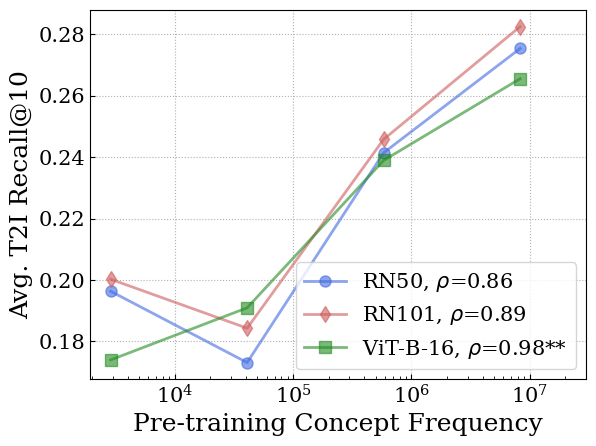

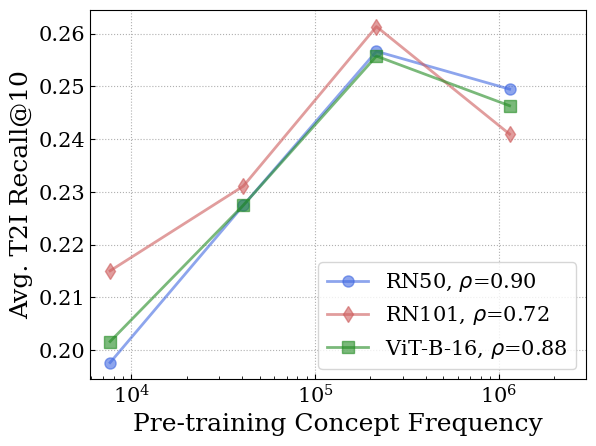

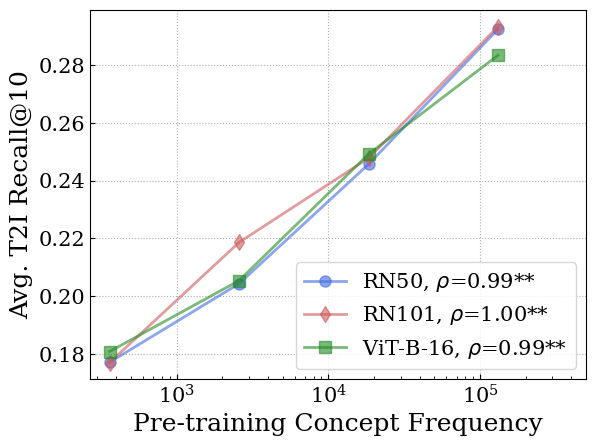

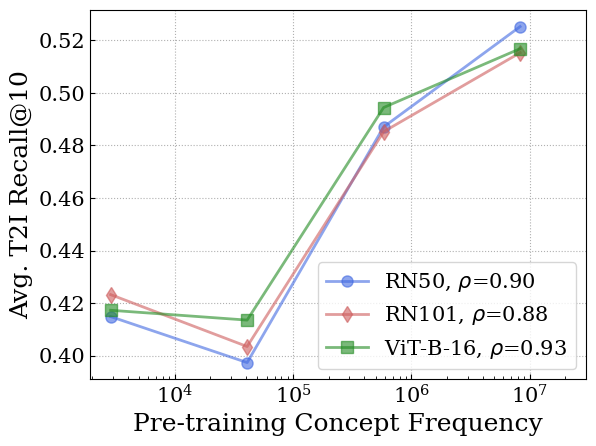

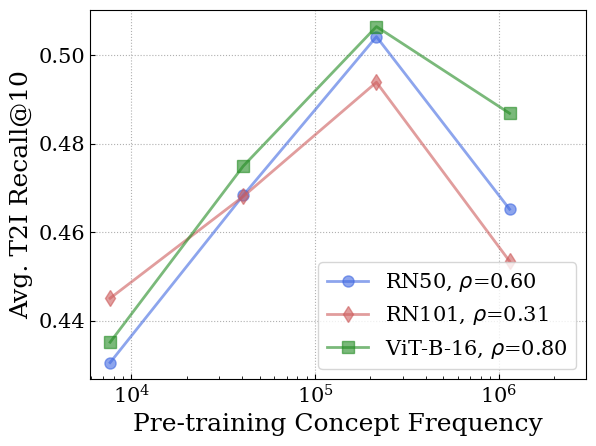

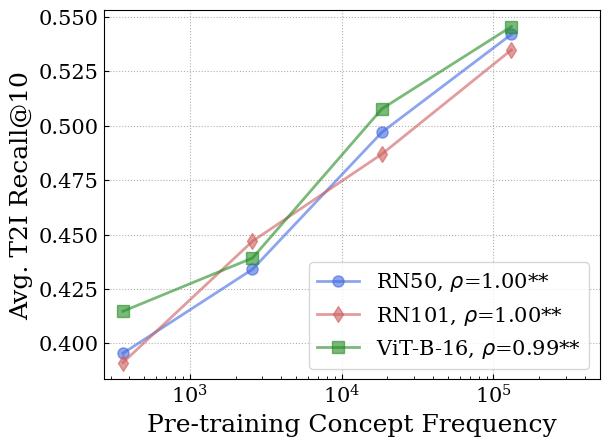

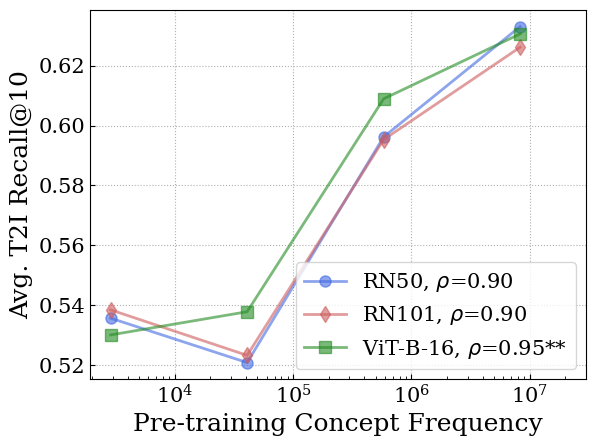

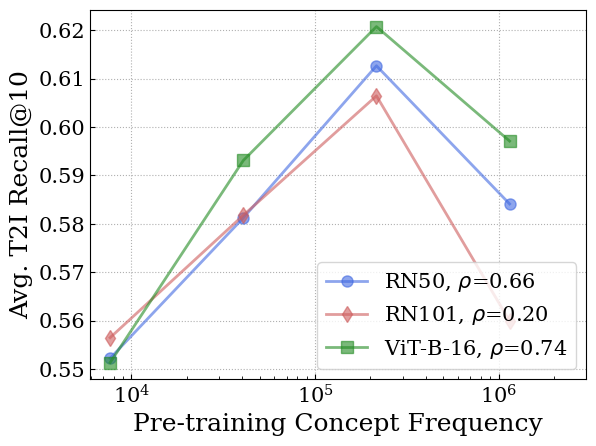

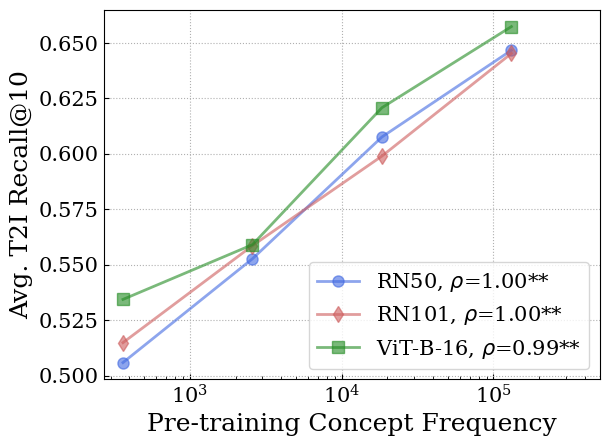

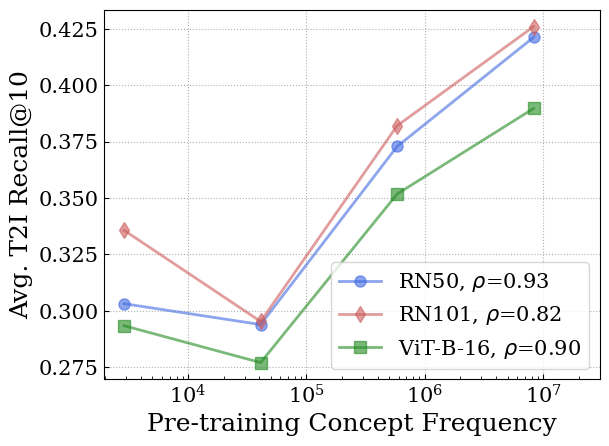

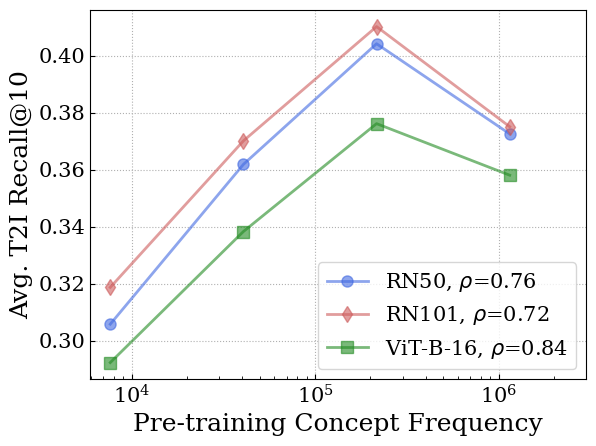

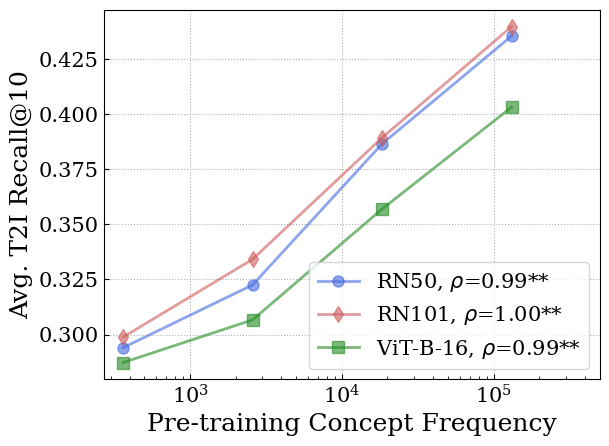

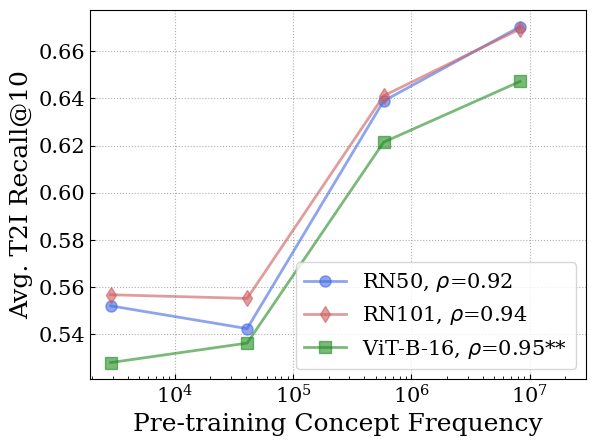

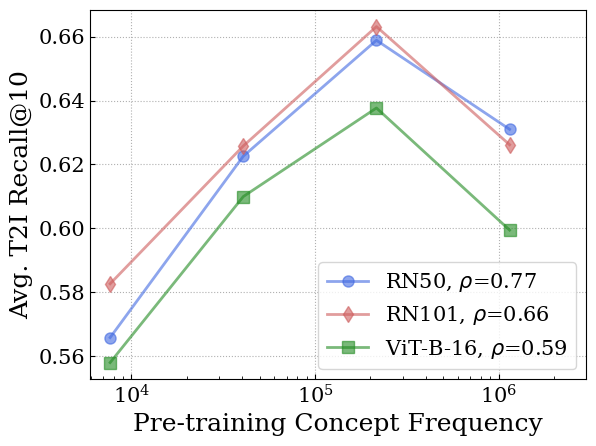

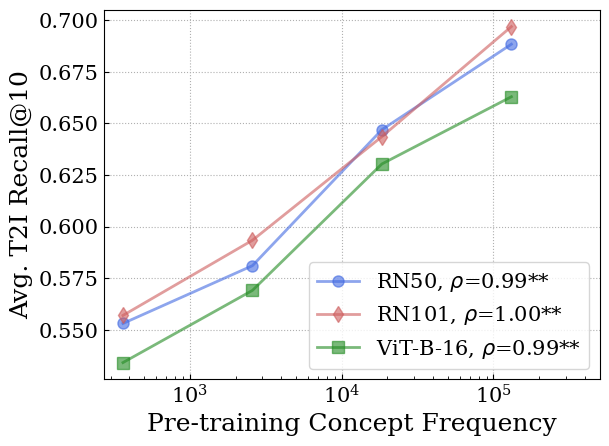

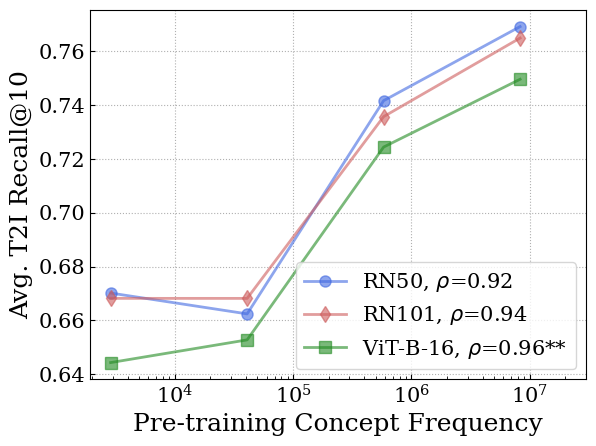

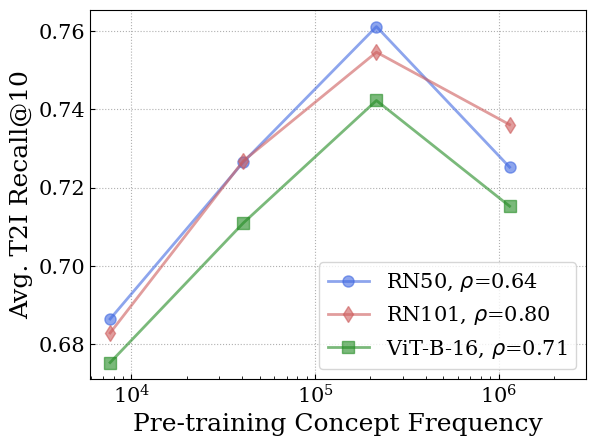

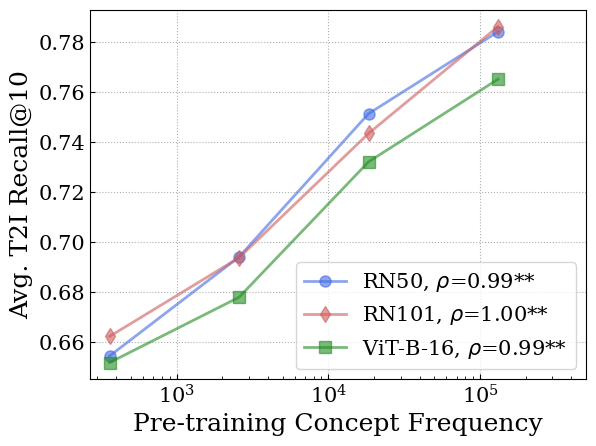

In [14]:
for pt in prompt_types:
    prompt_type = pt
    image_search_type = 'rampp0.7'
    text_search_type = 'lemmatized'
    pt_dataset = 'yfcc15m'
    integrated_search_type = 'integrated_rampp0.7'
    
    # image-search
    rn50_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    rn101_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN101'), 'rb'))
    vitb16_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # text-search
    rn50_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    rn101_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN101'), 'rb'))
    vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # integrated-search
    rn50_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    rn101_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN101'), 'rb'))
    vitb16_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))


    plt.figure(figsize=(6.4, 4.8))
    # image-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_image_res['exp_bins'][-4:]), rn50_image_res['cum_means'][-4:])
    rn101_corr, sig2 = pearsonr(np.log(rn101_image_res['exp_bins'][-4:]), rn101_image_res['cum_means'][-4:])
    vitb16_corr, sig3 = pearsonr(np.log(vitb16_image_res['exp_bins'][-4:]), vitb16_image_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    add3 = '**' if sig3<0.05 else ''
    
    plt.plot(rn50_image_res['exp_bins'][-4:], rn50_image_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(rn101_image_res['exp_bins'][-4:], rn101_image_res['cum_means'][-4:], marker='d', linestyle='solid', label=f'RN101, $\\rho$={rn101_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='indianred')
    plt.plot(vitb16_image_res['exp_bins'][-4:], vitb16_image_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add3, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 3*10**7)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=15)
    
    # plt.title('Accuracies vs PCF for YFCC-15M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-retrieval-yfcc15m-log-linear-plot-image-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)

    
    
    plt.figure(figsize=(6.4, 4.8))
    # text-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_text_res['exp_bins'][-4:]), rn50_text_res['cum_means'][-4:])
    rn101_corr, sig2 = pearsonr(np.log(rn101_text_res['exp_bins'][-4:]), rn101_text_res['cum_means'][-4:])
    vitb16_corr, sig3 = pearsonr(np.log(vitb16_text_res['exp_bins'][-4:]), vitb16_text_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    add3 = '**' if sig3<0.05 else ''
    
    plt.plot(rn50_text_res['exp_bins'][-4:], rn50_text_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(rn101_text_res['exp_bins'][-4:], rn101_text_res['cum_means'][-4:], marker='d', linestyle='solid', label=f'RN101, $\\rho$={rn101_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='indianred')
    plt.plot(vitb16_text_res['exp_bins'][-4:], vitb16_text_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add3, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 3*10**6)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=15)
    
    # plt.title('Accuracies vs PCF for YFCC-15M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-retrieval-yfcc15m-log-linear-plot-text-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)


    plt.figure(figsize=(6.4, 4.8))
    # integrated-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_integrated_res['exp_bins'][-4:]), rn50_integrated_res['cum_means'][-4:])
    rn101_corr, sig2 = pearsonr(np.log(rn101_integrated_res['exp_bins'][-4:]), rn101_integrated_res['cum_means'][-4:])
    vitb16_corr, sig3 = pearsonr(np.log(vitb16_integrated_res['exp_bins'][-4:]), vitb16_integrated_res['cum_means'][-4:])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    add3 = '**' if sig3<0.05 else ''
    
    plt.plot(rn50_integrated_res['exp_bins'][-4:], rn50_integrated_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(rn101_integrated_res['exp_bins'][-4:], rn101_integrated_res['cum_means'][-4:], marker='d', linestyle='solid', label=f'RN101, $\\rho$={rn101_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='indianred')
    plt.plot(vitb16_integrated_res['exp_bins'][-4:], vitb16_integrated_res['cum_means'][-4:], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add3, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. T2I Recall@10')
    plt.xscale('log')
    plt.xlim(0, 5*10**5)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=15)
    
    # plt.title('Accuracies vs PCF for YFCC-15M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-retrieval-yfcc15m-log-linear-plot-integrated-queried-search-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)




## LAION200M-train-test-sim-normalized

In [3]:
prompt_type = 't2i_k=10'
image_search_type = 'rampp0.7'
text_search_type = 'lemmatized'
pt_dataset = 'laion200m_train_test_sim_normalized'
integrated_search_type = 'integrated_rampp0.7'

# image-search
vitb32_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-32'), 'rb'))

# # text-search
# rn50_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
# rn101_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN101'), 'rb'))
# vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))

# # integrated-search
# rn50_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
# rn101_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN101'), 'rb'))
# vitb16_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))

/tmp/ipykernel_1609366/4237637967.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 9*10**7)


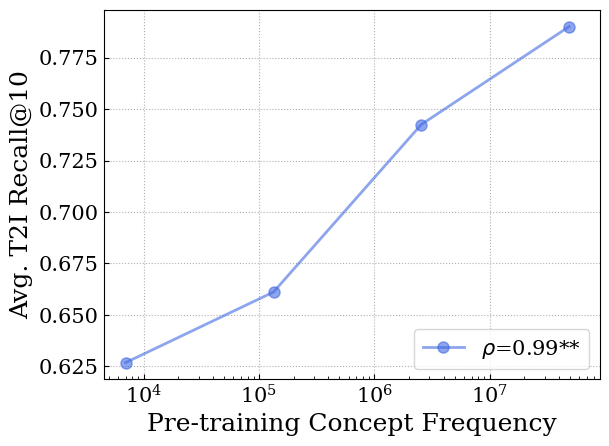

In [5]:
plt.figure(figsize=(6.4, 4.8))
# image-search

vitb32_corr, sig1 = pearsonr(np.log(vitb32_image_res['exp_bins'][-4:]), vitb32_image_res['cum_means'][-4:])

add1 = '**' if sig1<0.05 else ''

# plt.plot(vitb32_image_res['exp_bins'][-4:], vitb32_image_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'ViT-B-32, $\\rho$={vitb32_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
plt.plot(vitb32_image_res['exp_bins'][-4:], vitb32_image_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'$\\rho$={vitb32_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
plt.xlabel('Pre-training Concept Frequency')
plt.ylabel('Avg. T2I Recall@10')
plt.xscale('log')
plt.xlim(0, 9*10**7)
# sns.despine(trim=True, offset=5)
plt.legend(loc='lower right', fontsize=15)

# plt.title('Accuracies vs PCF for YFCC-15M\n(Image-search)')
plt.grid()
plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
plt.savefig('./plots/eccv-paper-retrieval-laion200m-train-test-sim-normalized-log-linear-plot-image-queried-search.png', dpi=500, bbox_inches='tight', transparent=True)

## SynthCLIP

In [6]:
prompt_type = 't2i_k=10'
image_search_type = 'rampp0.7'
text_search_type = 'lemmatized'
pt_dataset = 'synthci30m'
integrated_search_type = 'integrated_rampp0.7'

# image-search
vitb16_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))

# # text-search
vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))

# # integrated-search
vitb16_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))

/tmp/ipykernel_1609366/2854984818.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 6*10**7)


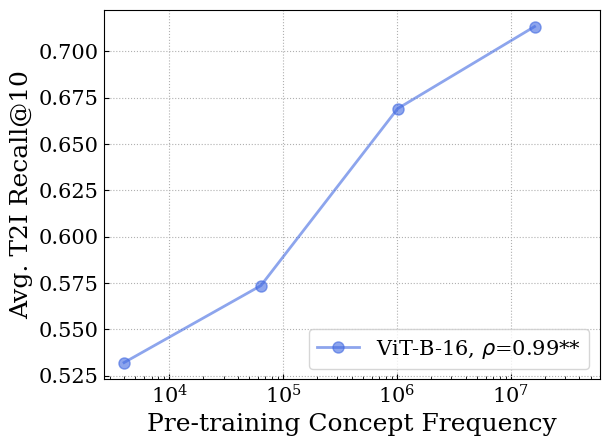

In [7]:
plt.figure(figsize=(6.4, 4.8))
# image-search

vitb16_corr, sig1 = pearsonr(np.log(vitb16_image_res['exp_bins'][-4:]), vitb16_image_res['cum_means'][-4:])

add1 = '**' if sig1<0.05 else ''

plt.plot(vitb16_image_res['exp_bins'][-4:], vitb16_image_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
plt.xlabel('Pre-training Concept Frequency')
plt.ylabel('Avg. T2I Recall@10')
plt.xscale('log')
plt.xlim(0, 6*10**7)
# sns.despine(trim=True, offset=5)
plt.legend(loc='lower right', fontsize=15)

# plt.title('Accuracies vs PCF for YFCC-15M\n(Image-search)')
plt.grid()
plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
plt.savefig('./plots/eccv-paper-retrieval-synthci30m-log-linear-plot-image-queried-search.png', dpi=500, bbox_inches='tight', transparent=True)

/tmp/ipykernel_1609366/3733463748.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 6*10**6)


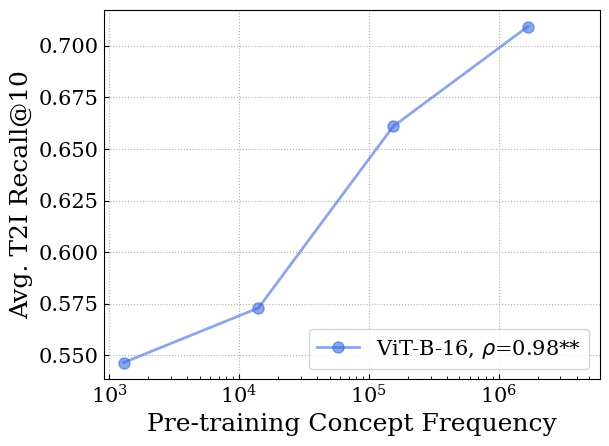

In [8]:
plt.figure(figsize=(6.4, 4.8))
# text-search

vitb16_corr, sig1 = pearsonr(np.log(vitb16_text_res['exp_bins'][-4:]), vitb16_text_res['cum_means'][-4:])

add1 = '**' if sig1<0.05 else ''

plt.plot(vitb16_text_res['exp_bins'][-4:], vitb16_text_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
plt.xlabel('Pre-training Concept Frequency')
plt.ylabel('Avg. T2I Recall@10')
plt.xscale('log')
plt.xlim(0, 6*10**6)
# sns.despine(trim=True, offset=5)
plt.legend(loc='lower right', fontsize=15)

# plt.title('Accuracies vs PCF for YFCC-15M\n(Image-search)')
plt.grid()
plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
plt.savefig('./plots/eccv-paper-retrieval-synthci30m-log-linear-plot-text-queried-search.png', dpi=500, bbox_inches='tight', transparent=True)

/tmp/ipykernel_1609366/850505959.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 6*10**6)


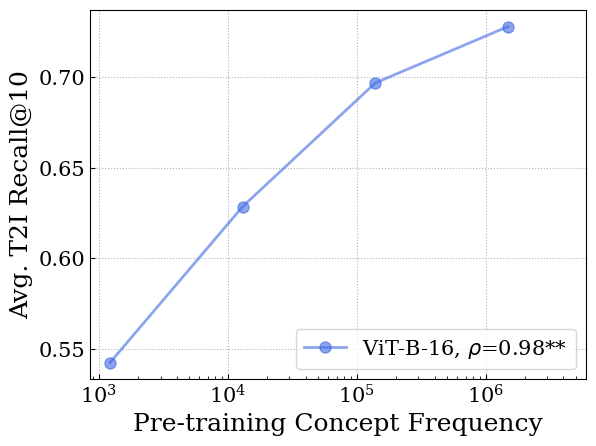

In [9]:
plt.figure(figsize=(6.4, 4.8))
# integrated-search

vitb16_corr, sig1 = pearsonr(np.log(vitb16_integrated_res['exp_bins'][-4:]), vitb16_integrated_res['cum_means'][-4:])

add1 = '**' if sig1<0.05 else ''

plt.plot(vitb16_integrated_res['exp_bins'][-4:], vitb16_integrated_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
plt.xlabel('Pre-training Concept Frequency')
plt.ylabel('Avg. T2I Recall@10')
plt.xscale('log')
plt.xlim(0, 6*10**6)
# sns.despine(trim=True, offset=5)
plt.legend(loc='lower right', fontsize=15)

# plt.title('Accuracies vs PCF for YFCC-15M\n(Image-search)')
plt.grid()
plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
plt.savefig('./plots/eccv-paper-retrieval-synthci30m-log-linear-plot-integrated-queried-search.png', dpi=500, bbox_inches='tight', transparent=True)

/tmp/ipykernel_1609366/1980399018.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 5*10**7)


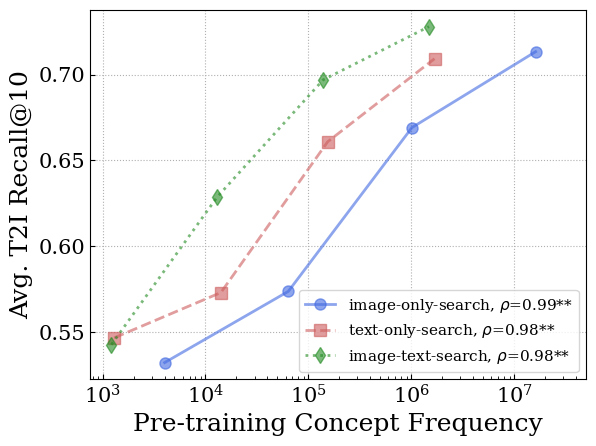

In [14]:
plt.figure(figsize=(6.4, 4.8))
# search

vitb16_image_corr, sig1 = pearsonr(np.log(vitb16_image_res['exp_bins'][-4:]), vitb16_image_res['cum_means'][-4:])
add1_image = '**' if sig1<0.05 else ''

vitb16_text_corr, sig1 = pearsonr(np.log(vitb16_text_res['exp_bins'][-4:]), vitb16_text_res['cum_means'][-4:])
add1_text = '**' if sig1<0.05 else ''

vitb16_integrated_corr, sig1 = pearsonr(np.log(vitb16_integrated_res['exp_bins'][-4:]), vitb16_integrated_res['cum_means'][-4:])
add1_integrated = '**' if sig1<0.05 else ''

plt.plot(vitb16_image_res['exp_bins'][-4:], vitb16_image_res['cum_means'][-4:], marker='o', linestyle='solid', label=f'image-only-search, $\\rho$={vitb16_image_corr:.2f}'+add1_image, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
plt.plot(vitb16_text_res['exp_bins'][-4:], vitb16_text_res['cum_means'][-4:], marker='s', linestyle='dashed', label=f'text-only-search, $\\rho$={vitb16_text_corr:.2f}'+add1_text, alpha=0.6, markersize=8, linewidth=2, c='indianred')
plt.plot(vitb16_integrated_res['exp_bins'][-4:], vitb16_integrated_res['cum_means'][-4:], marker='d', linestyle='dotted', label=f'image-text-search, $\\rho$={vitb16_integrated_corr:.2f}'+add1_integrated, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')

plt.xlabel('Pre-training Concept Frequency')
plt.ylabel('Avg. T2I Recall@10')
plt.xscale('log')
plt.xlim(0, 5*10**7)
# sns.despine(trim=True, offset=5)
plt.legend(loc='lower right', fontsize=11)

# plt.title('Accuracies vs PCF for YFCC-15M\n(Image-search)')
plt.grid()
plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
plt.savefig('./plots/eccv-paper-retrieval-synthci30m-log-linear-plot-all-queried-search.png', dpi=500, bbox_inches='tight', transparent=True)